Pivot Tables	
    Motivating Pivot Tables
	Pivot Tables by Hand
	Pivot Table Syntax

In [2]:
#pivot tables
import numpy as np
import pandas as pd
import seaborn as sb
t=sb.load_dataset('titanic')
print(t)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [7]:
print(t.groupby('sex')[['survived']].mean())
print(t.groupby(['sex','class'])['survived'].mean()) 


# pivot table

print(t.pivot_table('survived',index='sex',columns='class'))
print(t.pivot_table(index='sex',columns='class',aggfunc={'survived':sum,'fare':'mean'}))


        survived
sex             
female  0.742038
male    0.188908
sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447
              fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47


Vectorized String Operations	
    Introducing Pandas String Operations
	Tables of Pandas String Methods

In [ ]:
#Introducing Pandas String Operations
import pandas as pd
a=['datascience','java','python','django']

#Tables of Pandas String Methods

len() lower() translate() islower() ljust() upper() startswith() isupper() rjust() find() endswith() isnumeric() center() rfind() isalnum() isdecimal() zfill() index() isalpha() split() strip() rindex() isdigit() rsplit() rstrip() capitalize() isspace() partition() lstrip() swapcase() istitle() rpartition()

In [54]:
Sops ="Data Science"
a=['Data Science and Regular Science','Java','python','Django']
ser=pd.Series(a)
#print(ser)
print("Len for string",len(Sops))
print("Length for pandas series",ser.str.len())
print("Lower for pandas series",ser.str.lower())
print("Upper for pandas series",ser.str.upper())
t=str.maketrans("S","$")
print(Sops.translate(t))
print("Is Lower for pandas series",ser.str.islower())

print("Ljust", ser.str.ljust(20,'_'))
print("rjust", ser.str.rjust(20,'_'))
print("center", ser.str.center(20))
print("rfind", ser.str.rfind("a"))  # last occurance of a charatcer in a string is printed
print("rindex", Sops.rindex("a",0, 10)) 
print("find", ser.str.find("n"))
print('startswith',ser.str.startswith('P'))
print('endswith',ser.str.endswith('o'))
print('isnumeric',ser.str.isnumeric())
print('isalnum',ser.str.isalnum())
print('is decimal',ser.str.isdecimal())
print('is alpha',ser.str.isalpha())
print('zfill',ser.str.zfill(10))
print('isspace',ser.str.isspace())
print('istitle',ser.str.istitle())
print('isdigit',ser.str.isdigit())
print('swap case',ser.str.swapcase())
print('Capitalize',ser.str.capitalize())
print('strip',ser.str.strip())
print('rstrip',ser.str.rstrip())
print('lstrip',ser.str.lstrip())
print(ser.str.rpartition())

Len for string 12
Length for pandas series 0    32
1     4
2     6
3     6
dtype: int64
Lower for pandas series 0    data science and regular science
1                                java
2                              python
3                              django
dtype: object
Upper for pandas series 0    DATA SCIENCE AND REGULAR SCIENCE
1                                JAVA
2                              PYTHON
3                              DJANGO
dtype: object
Data $cience
Is Lower for pandas series 0    False
1    False
2     True
3    False
dtype: bool
Ljust 0    Data Science and Regular Science
1                Java________________
2                python______________
3                Django______________
dtype: object
rjust 0    Data Science and Regular Science
1                ________________Java
2                ______________python
3                ______________Django
dtype: object
center 0    Data Science and Regular Science
1                        Java        
2        

Working with Time Series	
    Working with Time Series
	Dates and Times in Python
	Pandas Time Series: Indexing by Time
	Pandas Time Series Data Structures
	Frequencies and Offsets
	Resampling, Shifting, and Windowing

1.Time stamps (eg: january 31st,2023 at 8.25PM) 
2.Time interval (eg: 24 hours in a day)
3.Time deltas (eg: 22.56 seconds)

Code Meaning Time span (relative) 
Time span (absolute) 
Y Year ± 9.2e18 years [9.2e18 BC, 9.2e18 AD] 
M Month ± 7.6e17 years [7.6e17 BC, 7.6e17 AD]
W Week ± 1.7e17 years [1.7e17 BC, 1.7e17 AD]
D Day ± 2.5e16 years [2.5e16 BC, 2.5e16 AD] 
h Hour ± 1.0e15 years [1.0e15 BC, 1.0e15 AD] 
m Minute ± 1.7e13 years [1.7e13 BC, 1.7e13 AD] 
s Second ± 2.9e12 years [ 2.9e9 BC, 2.9e9 AD] 
ms Millisecond ± 2.9e9 years [ 2.9e6 BC, 2.9e6 AD] 
us Microsecond ± 2.9e6 years [290301 BC, 294241 AD] 
ns Nanosecond ± 292 years [ 1678 AD, 2262 AD] 
ps Picosecond ± 106 days [ 1969 AD, 1970 AD] 
fs Femtosecond ± 2.6 hours [ 1969 AD, 1970 AD]
as Attosecond ± 9.2 seconds [ 1969 AD, 1970 AD]

In [68]:
#Dates and Times in Python
import datetime
now = datetime.datetime.now()
print(now)
current_date = datetime.date.today()
print(current_date)
print(dir(datetime)) # giving all date time methods
print(datetime.timedelta)

from datetime import date
todays_date = date.today()
print(todays_date)

print("Current year:", todays_date.year)
print("Current month:", todays_date.month)
print("Current day:", todays_date.day)
from datetime import datetime
# datetime(year, month, day, hour, minute, second, microsecond)
b = datetime(2022, 12, 28, 23, 55, 59, 342380)
print(b)

from datetime import timedelta

t1 = timedelta(weeks = 2, days = 5, hours = 1, seconds = 33)
t2 = timedelta(days = 4, hours = 11, minutes = 4, seconds = 54)
t3 = t1 - t2
print("t3 =", t3)

#timezone

from datetime import datetime
import pytz

local = datetime.now()
print("Local:", local.strftime("%m/%d/%Y, %H:%M:%S"))
tz_NY = pytz.timezone('America/New_York') 
datetime_NY = datetime.now(tz_NY)
print("NY:", datetime_NY.strftime("%m/%d/%Y, %H:%M:%S"))
tz_London = pytz.timezone('Europe/London')
datetime_London = datetime.now(tz_London)
print("London:", datetime_London.strftime("%m/%d/%Y, %H:%M:%S"))

2023-03-07 22:36:20.155230
2023-03-07
['MAXYEAR', 'MINYEAR', 'UTC', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'date', 'datetime', 'datetime_CAPI', 'sys', 'time', 'timedelta', 'timezone', 'tzinfo']
<class 'datetime.timedelta'>
2023-03-07
Current year: 2023
Current month: 3
Current day: 7
2022-12-28 23:55:59.342380
t3 = 14 days, 13:55:39
Local: 03/07/2023, 22:36:20
NY: 03/07/2023, 12:06:28
London: 03/07/2023, 17:06:28


In [3]:
#Pandas Time Series: Indexing by Time
import numpy as np
date=np.array('2015-07-04', dtype=np.datetime64)
print(date)

import pandas as pd
d=pd.to_datetime('31st of January, 2023')
print(d)

#DatetimeIndex
ind=pd.DatetimeIndex(['2014-07-04','2014-08-04','2015-07-04','2015-08-04'])
s= pd.Series([0,1,2,3],index=ind)
print(s)

2015-07-04
2023-01-31 00:00:00
2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64


Pandas Time Series Data Structures
Frequencies and Offsets
Resampling, Shifting, and Windowing

1.Time stamps (eg: january 31st,2023 at 8.25PM)=>numpy.datetime64, DatetimeIndex
2.Time interval (eg: 24 hours in a day)=>numpy.datetime64,PeriodIndex
3.Time deltas (eg: 22.56 seconds)=>numpy.timedelta64, TimedeltaIndex

In [7]:
import pandas as pd
d=pd.to_datetime('31st of January, 2023')
print(d)

#stamps
ind=pd.DatetimeIndex(['2014-07-04','2014-08-04','2015-07-04','2015-08-04'])
i1=pd.Series([0,1,2,3],index=ind)
print(i1)

#interval
print(d.to_period('D'))

#deltas
#timedelta_range

print(pd.timedelta_range(0, periods=10, freq='H'))


2023-01-31 00:00:00
2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64
2023-01-31
TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')


Frequencies and Offsets

Code	Description	Code	Description
D	Calendar day	B	Business day
W	Weekly		
M	Month end	BM	Business month end
Q	Quarter end	BQ	Business quarter end
A	Year end	BA	Business year end
H	Hours	BH	Business hours
T	Minutes		
S	Seconds		
L	Milliseonds		
U	Microseconds		
N	nanoseconds	


Code	Description		Code	Description
MS	Month start		BMS	Business month start
QS	Quarter start		BQS	Business quarter start
AS	Year start		BAS	Business year start


Q-JAN, BQ-FEB, QS-MAR, BQS-APR

In [16]:
d=pd.Timestamp('2023-03-10')
print('d',d.day_name()) 

d1=d+pd.Timedelta("1 day")
print('d1',d1.day_name())


pd.offsets.BDay() #--> Buisness day
a0=d1+pd.Timedelta("1 day")
print('a0',a0.day_name())
a=d1+pd.offsets.BDay()
print('a',a.day_name())

d Friday
d1 Saturday
a0 Sunday
a Monday


In [18]:
from pandas.tseries.offsets import BDay
print(pd.date_range('2023-03-06', periods=5,freq=BDay()))

DatetimeIndex(['2023-03-06', '2023-03-07', '2023-03-08', '2023-03-09',
               '2023-03-10'],
              dtype='datetime64[ns]', freq='B')


In [36]:
pip install pandas-datareader==0.7.0

     ---------------------------------------- 0.0/111.7 kB ? eta -:--:--
     -------------------------------- ------ 92.2/111.7 kB 2.6 MB/s eta 0:00:01
     ---------------------------------- --- 102.4/111.7 kB 2.0 MB/s eta 0:00:01
     ---------------------------------- --- 102.4/111.7 kB 2.0 MB/s eta 0:00:01
     ---------------------------------- --- 102.4/111.7 kB 2.0 MB/s eta 0:00:01
     ---------------------------------- --- 102.4/111.7 kB 2.0 MB/s eta 0:00:01
     ---------------------------------- --- 102.4/111.7 kB 2.0 MB/s eta 0:00:01
     ---------------------------------- --- 102.4/111.7 kB 2.0 MB/s eta 0:00:01
     ---------------------------------- --- 102.4/111.7 kB 2.0 MB/s eta 0:00:01
     ---------------------------------- --- 102.4/111.7 kB 2.0 MB/s eta 0:00:01
     ------------------------------------ 111.7/111.7 kB 224.0 kB/s eta 0:00:00
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-data

             Open   High    Low  Close    Volume
Date                                            
2019-09-10  47100  47200  46550  47000   9231792
2019-09-11  47300  47400  46800  47150  16141619
2019-09-16  47000  47100  46400  47100  15550926
2019-09-17  47000  47100  46800  46900   7006280
2019-09-18  46900  47700  46800  47700  10413027


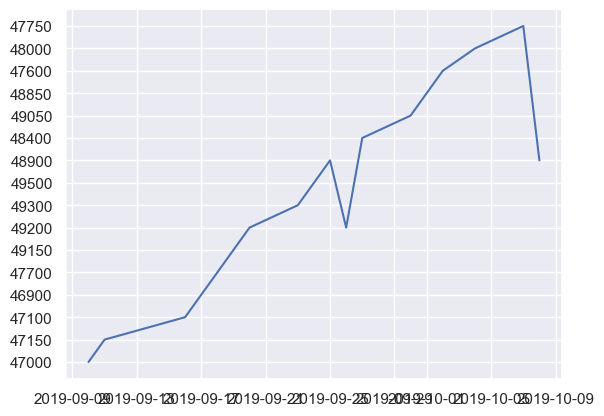

In [56]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
#KOSPI, KOSDAQ
df = web.DataReader('005930', 'naver', start='2019-09-10', end='2019-10-09')
print(df.head()) 
df=df['Close']
plt.plot(df)